In [1]:
import pandas as pd
import numpy as np
import plotly
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import *

In [2]:
data = pd.read_csv('S&P500_5yr_.csv')
print(data.columns,"\n")
print("Shape: ",data.shape)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'WeekDay',
       'WeekDay No'],
      dtype='object') 

Shape:  (619040, 9)


In [3]:
data.head()

,date,open,high,low,close,volume,Name,WeekDay,WeekDay No
0,08-02-2013,15.07,15.12,14.63,14.75,8407500,AAL,Friday,6
1,11-02-2013,14.89,15.01,14.26,14.46,8882000,AAL,Monday,2
2,12-02-2013,14.45,14.51,14.10,14.27,8126000,AAL,Tuesday,3
3,13-02-2013,14.30,14.94,14.25,14.66,10259500,AAL,Wednesday,4
4,14-02-2013,14.94,14.96,13.16,13.99,31879900,AAL,Thursday,5


In [4]:
data.isnull().sum()

date           0
open          11
high           8
low            8
close          0
volume         0
Name           0
WeekDay        0
WeekDay No     0
dtype: int64

In [5]:
np.where(pd.isnull(data))

(array([ 82949,  82949,  82949, 165734, 165857, 165857, 165857, 205076,
        239832, 239832, 239832, 434379, 434502, 434502, 434502, 478594,
        478594, 478594, 558213, 558213, 558213, 581906, 581906, 581906,
        598236, 598236, 598236], dtype=int64),
 array([1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1,
        2, 3, 1, 2, 3], dtype=int64))

In [6]:
d=['date','open','high','low']
for i in range(1,int(data.shape[0])):
    for j in range(1,4):
        if pd.isnull(data.loc[i,d[j]]):
            data.loc[i,d[j]]=(data.loc[i-1,d[j]]+data.loc[i+1,d[j]])/2

In [7]:
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

In [8]:
d=data.iloc[:,1:5]
d.corr(method ='spearman')

,open,high,low,close
open,1.000000,0.999896,0.999882,0.999788
high,0.999896,1.000000,0.999837,0.999895
low,0.999882,0.999837,1.000000,0.999892
close,0.999788,0.999895,0.999892,1.000000


## Open vs High

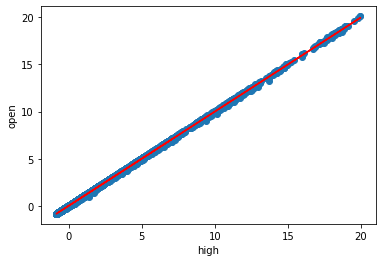

Error : 0.01 for high


In [9]:
X = data.iloc[:,2:3]
y = data.iloc[:,1]
normalized_X=(X-X.mean())/X.std()
normalized_y=(y-y.mean())/y.std()
X_train, X_test, y_train, y_test = train_test_split(normalized_X, normalized_y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred, 'red')
plt.xlabel('high')
plt.ylabel('open')
plt.show()
err = mean_absolute_error(y_pred, y_test)
print(f"Error : {round(err,2)} for {data.columns[2]}")

## Low vs Close

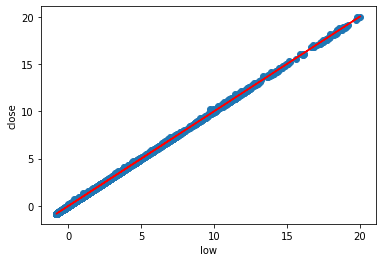

Error : 0.01 for low


In [10]:
X = data.iloc[:,3:4]
y = data.iloc[:,4]
normalized_X=(X-X.mean())/X.std()
normalized_y=(y-y.mean())/y.std()
X_train, X_test, y_train, y_test = train_test_split(normalized_X, normalized_y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred, 'red')
plt.xlabel('low')
plt.ylabel('close')
plt.show()
err = mean_absolute_error(y_pred, y_test)
print(f"Error : {round(err,2)} for {data.columns[3]}")

## Regularized Regression for 'open'

In [11]:
X = data.iloc[:,2:5]
y = data.iloc[:,1]
normalized_X=(X-X.mean())/X.std()
normalized_y=(y-y.mean())/y.std()
X_train, X_test, y_train, y_test = train_test_split(normalized_X, normalized_y, test_size=0.25, random_state=42)

# Lasso
model1 = Lasso(alpha=1e-5)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
err = mean_absolute_error(y_pred, y_test)
print("Error : %.7f for Lasso Regression" %(err))

# Ridge
model2 = Ridge(alpha=1e-3)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
err = mean_absolute_error(y_pred, y_test)
print("Error : %.7f for Ridge Regression" %(err))

Error : 0.0051956 for Lasso Regression
Error : 0.0035316 for Ridge Regression


## Multivariate Regression for 'open'

In [12]:
X = data.iloc[:,2:5]
y = data.iloc[:,1]
normalized_X=(X-X.mean())/X.std()
normalized_y=(y-y.mean())/y.std()
X_train, X_test, y_train, y_test = train_test_split(normalized_X, normalized_y, test_size=0.20, random_state=42)
model3 = LinearRegression()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
err = mean_absolute_error(y_pred, y_test)
print("Error : %.7f for Multivariate Linear Regression" %(err))

Error : 0.0035239 for Multivariate Linear Regression


## Regularized Regression for 'close'

In [13]:
X = data.iloc[:,1:4]
y = data.iloc[:,4]
normalized_X=(X-X.mean())/X.std()
normalized_y=(y-y.mean())/y.std()
X_train, X_test, y_train, y_test = train_test_split(normalized_X, normalized_y, test_size=0.25, random_state=42)

# Lasso
model4 = Lasso(alpha=1e-5, max_iter=5000)
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
err = mean_absolute_error(y_pred, y_test)
print("Error : %.7f for Lasso Regression" %(err))

# Ridge
model5 = Ridge(alpha=1e-3, max_iter=5000)
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
err = mean_absolute_error(y_pred, y_test)
print("Error : %.7f for Ridge Regression" %(err))

Error : 0.0055488 for Lasso Regression
Error : 0.0034895 for Ridge Regression


## Multivariate Regression for 'close'

In [14]:
X = data.iloc[:,1:4]
y = data.iloc[:,4]
normalized_X=(X-X.mean())/X.std()
normalized_y=(y-y.mean())/y.std()
X_train, X_test, y_train, y_test = train_test_split(normalized_X, normalized_y, test_size=0.20, random_state=42)
model6 = LinearRegression()
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
err = mean_absolute_error(y_pred, y_test)
print("Error : %.7f for Multivariate Linear Regression" %(err))

Error : 0.0034761 for Multivariate Linear Regression
